In [17]:
from google.colab import files
from IPython.display import Image
upload = files.upload()

Saving conv_result.PNG to conv_result.PNG


### Sequence Model

Previous lesson, finish by looking at the effect of tokenizing words and classifer fail to get any meaningful results. The main reason is that context of words **was hard to follow for sub-word instead the sequence**

For Example, Fibonacci sequence, 

$$x_{n} = x_{n-1} + x_{n-2}$$

The ieda of Fibonacci sequence is similar to recurrent neural network. You can x as input and y as output. There's also an element that fed into function from previous function. **Output of previous function as input to next stage function**, **As you can see $x_{0}$ fed all the way through network**


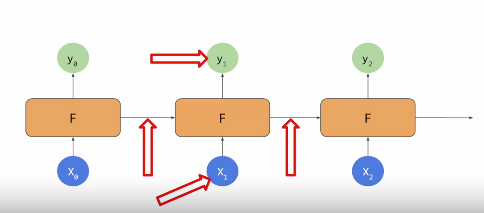

In [6]:
Image('rnn.PNG', width = 600)

## LSTM

Motivating Example: 

<center>I lived in Ireland, so at school they made me learn how to speak <...>(Gaelic) </center>

Context Keyword gives the details about the language. Irish describe the people, Gaelic describe language. The word Irish appear eariler in the sentence, if we're looking at the sequence, we may lose that context.

LSTM instead of context passed in RNN, LSTM have additional pipelines contexts called **cell state**, which can pass through the network to impact it. Cell state can also be **bidirectional**, so later context can impact earlier ones 



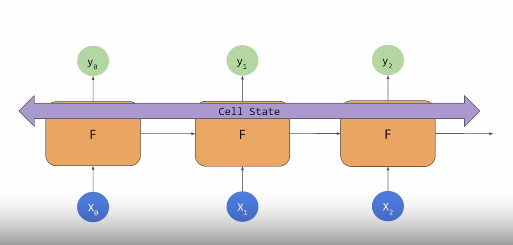

In [8]:
Image('LSTM.PNG', width = 600)

In [0]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    # Bidirectional RNN, output will be 128, even if we specify 64, but bidirectional rnn double it 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), # 64 is the number of outputs that I desire from that layer,
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.summary()

model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    # stack two LSTM
    # do have put return_sequences = True on the first one
    # return_sequences = True : ensure the output of LSTM match the desired inputs of next LSTM 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64), return_sequences = True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


### Return Sequences,

Whether to return  the full sequence in the output sequence, or only the last output.

default tf.keras.layers.Bidirectional return_sequence = False, it means **only output the last hidden state output** $a^{<T>}$, The last hidden state output captures an abstract representation of the input sequence. 

*   If specify return_sequence = True, output dimenison will be  (#Samples, #Time steps, #LSTM units)
*   If specify return_sequence = False,  output dimenison will be  (#Samples, #LSTM units), only one timestep for last hidden state output


### Return states

In GRU, hidden state and cell state is equal , $c^{<t>} = a^{<t>}$, and for LSTM, $c^{<t>} \neq a^{<t>}$

return_state = True, can output RNN last cell state in addi
tional to hidden state. 

*   **LSTM(units, return_state=True)**: output of LSTM have three components, $(a^{<T>}, a^{<T>}, c^{<T>}  )$, T stands for last step. **Note**: the number in first dimenison $a^{<T>}$ and the number in second dimension $a^{<T>}$  is the same. 
*   **LSTM(units, return_sequences=True,  return_state=True)**, output will be $(a^{<1...T>}, a^{<T>}, c^{<T>}  )$, **Note** at first dimension,  $(a^{<1...T>}$ last one number is the same as second dimension $a^{<T>}$. 
*   **GRU(units, return_sequences=True,  return_state=True)**: output will be $(a^{<1...T>}, c^{<T>}  )$ since in GRU  $c^{<t>} = a^{<t>}$


[Link for Quotation](https://www.dlology.com/blog/how-to-use-return_state-or-return_sequences-in-keras/#targetText=By%20default%2C%20the%20return_sequences%20is,representation%20of%20the%20input%20sequence.)

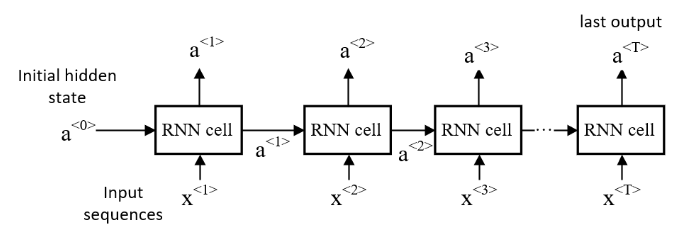

In [11]:
Image('rnn2.PNG', width = 600)

### Using GRU

**Time for training is quicker than LSTM**


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)), # 32 is the number of outputs that I desire from that layer,
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

### Inspect Result using LSTM 

Using IMDB dataset, Compare the accuracy between Flatten plus GlobalAveragePooling and LSTM

*    **FLatten + GlobalAveragePooling**: traing quickly. quickly get to 85% and flatten there.
*    **LSTM**: traing slowly. reach 85% really quickly and continue climbing toward about 97.5% within 50 epochs. The validataion set drop slowly but close to NON-LSTM version value. A little overfitting. When accuracy of prediction increase, whereas the confidence decrease


In [0]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

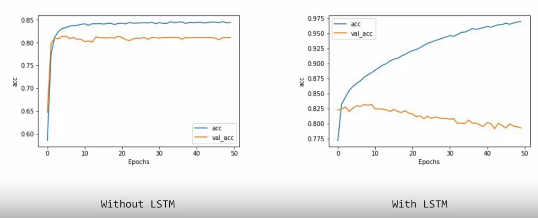

In [15]:
Image('LSTM_result.PNG', width = 800)

In [0]:
# Use convolution Neural Network

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Conv1D(128, 5, activation = 'relu'), #output is (max_length - 5, 128)
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


### Inspect Result Using Convolution

The accuracy better than before with close to 100% on training and 80% on validation. As before, loss increase on validation, indicating **overfitting**




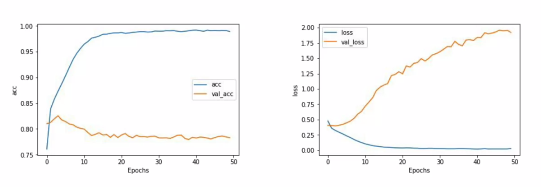

In [19]:
Image('conv_result.PNG', width = 800)

### Overfiting

The issue of overfitting not only because of **out of vocabulary**, also becaues of n**ot present in training set**, naturally lead to overfitting
